In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [21]:
# -----------------------------
# 1) 데이터 불러오기
# -----------------------------
file_path = "/content/drive/MyDrive/Colab Notebooks/diabetes.csv"
df = pd.read_csv(file_path)

In [22]:
# -----------------------------
# 2) 결측치 확인 및 처리
# -----------------------------
print("=== 결측치 확인 ===")
print(df.isnull().sum())

# 결측치가 있으면 평균으로 대체
df.fillna(df.mean(), inplace=True)

=== 결측치 확인 ===
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


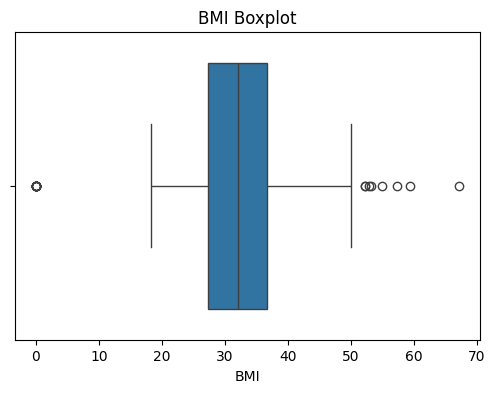

In [23]:
# -----------------------------
# 3) 이상치 확인 및 처리 (BMI 기준)
# -----------------------------
plt.figure(figsize=(6,4))
sns.boxplot(x=df['BMI'])
plt.title("BMI Boxplot")
plt.show()

In [24]:
# 평균 ± 3*표준편차 기준으로 이상치 제거
bmi_mean = df['BMI'].mean()
bmi_std = df['BMI'].std()
df = df[(df['BMI'] > bmi_mean - 3*bmi_std) & (df['BMI'] < bmi_mean + 3*bmi_std)]

In [25]:
# -----------------------------
# 4) 특징(X)과 타깃(y) 분리
# -----------------------------
y = df['BMI'].values
X = df.drop('BMI', axis=1).values

In [27]:
# -----------------------------
# 5) 데이터 분할 및 스케일링
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# -----------------------------
# 6) 딥러닝 모델 구성
# -----------------------------
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # 회귀용 출력층

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
# -----------------------------
# 7) 모델 컴파일
# -----------------------------
model.compile(optimizer='adam', loss='mse')

In [30]:
# -----------------------------
# 8) 모델 학습
# -----------------------------
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 1065.3085 - val_loss: 995.9982
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 899.8842 - val_loss: 698.3457
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 565.1196 - val_loss: 246.2290
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 178.3026 - val_loss: 79.4084
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 97.6688 - val_loss: 69.5616
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 69.9067 - val_loss: 69.6813
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 84.2930 - val_loss: 65.0148
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 63.7801 - val_loss: 64.0099
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 68.6000 - val_loss: 63.9104
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 70.1531 - val_loss: 64.1171
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 55.3627 - val_loss: 62.5842
Epoch 12/100
16/16 ━━━━━━━━━━━━━

In [31]:
# -----------------------------
# 9) 모델 평가
# -----------------------------
mse = model.evaluate(X_test, y_test, verbose=0)
print(f"Test MSE: {mse:.4f}")

Test MSE: 39.1854


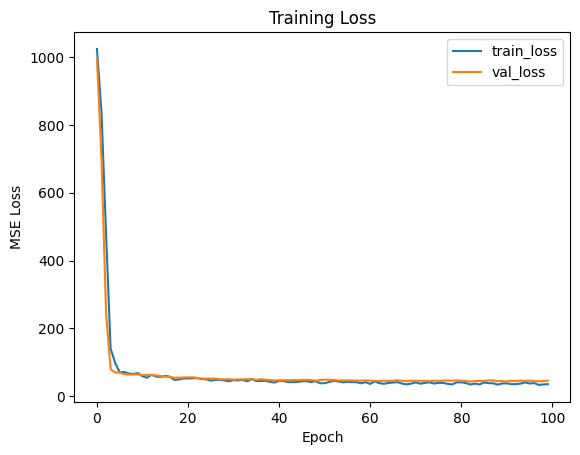

In [32]:
# -----------------------------
# 10) 학습 과정 시각화
# -----------------------------
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss')
plt.legend()
plt.show()